In [1]:
import sys; sys.path.append("..")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from evaldets.metrics import resample_pr_curve
from evaldets.results import *
from evaldets.postprocess import save_plot
# plt.rcParams['figure.figsize'] = (6, 6)
c=0

In [2]:
dr = DetectionResults('~/reval_05/baseline_05/evaluator_dump_R50_101/', area_rng=None, iou_thresh=None, debug=0)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


In [3]:
nGT = dr.num_gt_class('person')
dets = dr.detections_by_class('person')

In [4]:
TP = dr._tp_sum('person', 0.5)
FP = dr._fp_sum('person', 0.5)
TPR = TP / nGT
PPV = TP / (TP + FP)
PPVi = interpolated_PPV(PPV)
len(PPV)

73656

In [5]:
# see COCOeval.accumulate()
recThrs, q = resample_pr_curve(TPR, PPVi, np.linspace(0.0, 1.00, 11, endpoint=True))

### Precision vs monotonic precision

Saved 03-precision-recall-1-PPV_vs_PPVi.png


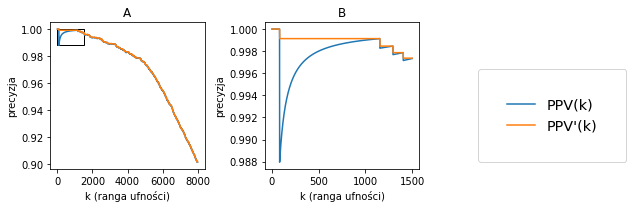

In [6]:
CHUNK = 8000
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes = iter(axes.ravel())
ax2 = next(axes)
ax2.plot(PPV[:CHUNK], label="PPV(k)");
ax2.plot(PPVi[:CHUNK], label="PPV'(k)");
ax2.set_title('A')
ax2.set_ylabel("precyzja")
ax2.set_xlabel("k (ranga ufności)")
# ax2.legend();
ax2.add_patch(Rectangle((0, PPV[:1500].min()), 1500, 1-PPV[:1500].min(), fill=False))


ax2 = next(axes)
ax2.plot(PPV[:1500], label="PPV(k)");
ax2.plot(PPVi[:1500], label="PPV'(k)");
ax2.set_title('B')
ax2.set_ylabel("precyzja")
ax2.set_xlabel("k (ranga ufności)")
# ax2.legend();

ax3 = next(axes)
ax3.axis('off')
ax3.legend(*ax2.get_legend_handles_labels(), loc='lower right', fontsize='x-large', borderpad=2)
fig.tight_layout()
save_plot(fig, "03-precision-recall-1-PPV_vs_PPVi", p=0, c=c)

### PR-curve and AveP / AP

Saved 03-precision-recall-2-PR_AP_examples.png


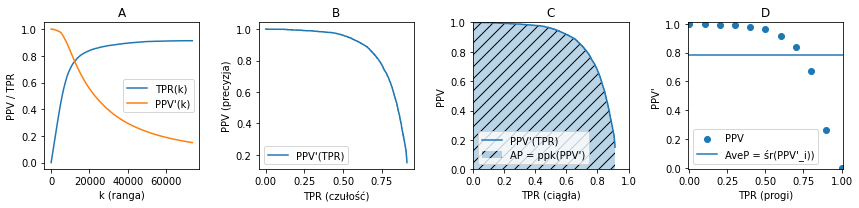

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes = iter(axes.ravel())

ax2 = next(axes)
ax2.plot(TPR, label="TPR(k)");
ax2.plot(PPVi, label="PPV'(k)");
ax2.set_title('A')
ax2.set_ylabel("PPV / TPR")
ax2.set_xlabel("k (ranga)")
ax2.legend();

ax2 = next(axes)
ax2.plot(TPR, PPVi, label="PPV'(TPR)");
ax2.set_title('B')
ax2.set_ylabel("PPV (precyzja)")
ax2.set_xlabel("TPR (czułość)")
ax2.legend()

ax2 = next(axes)
ax2.plot(TPR, PPVi, label="PPV'(TPR)");
ax2.set_title('C')
ax2.set_ylabel("PPV")
ax2.set_xlabel("TPR (ciągła)")
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.fill_between(TPR, PPVi, hatch='//', alpha=0.3, label="AP = ppk(PPV')")
ax2.legend()

ax2 = next(axes)
ax2.scatter(recThrs, q, label="PPV");
ax2.axhline(np.mean(q), label="AveP = śr(PPV'_i))")
ax2.set_title('D')
ax2.set_ylabel("PPV'")
ax2.set_xlabel("TPR (progi)")
ax2.set_xlim([-0.01, 1.01])
ax2.set_ylim([-0.01, 1.01])
ax2.legend(loc='lower left')

fig.tight_layout()
save_plot(fig, "03-precision-recall-2-PR_AP_examples", p=0, c=c)